# Housing Project

## Setting up

In [24]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import sys  
sys.path.insert(0, r'C:\Users\Cora\OneDrive\ML-Preparation\HousingProject')

projectDir = r"C:\Users\Cora\OneDrive\ML-Preparation\HousingProject"+"/"

In [37]:
import pandas as pd
import numpy as np

## The data

In [323]:
raw = pd.read_csv(projectDir+'dataset/housing.csv')

### Exploring the dataset

#### Looking at the data

In [206]:
raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Checking for missing

In [207]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Checking for basic statistics of each field

In [208]:
raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256B5DE1518>,
      dtype=object)

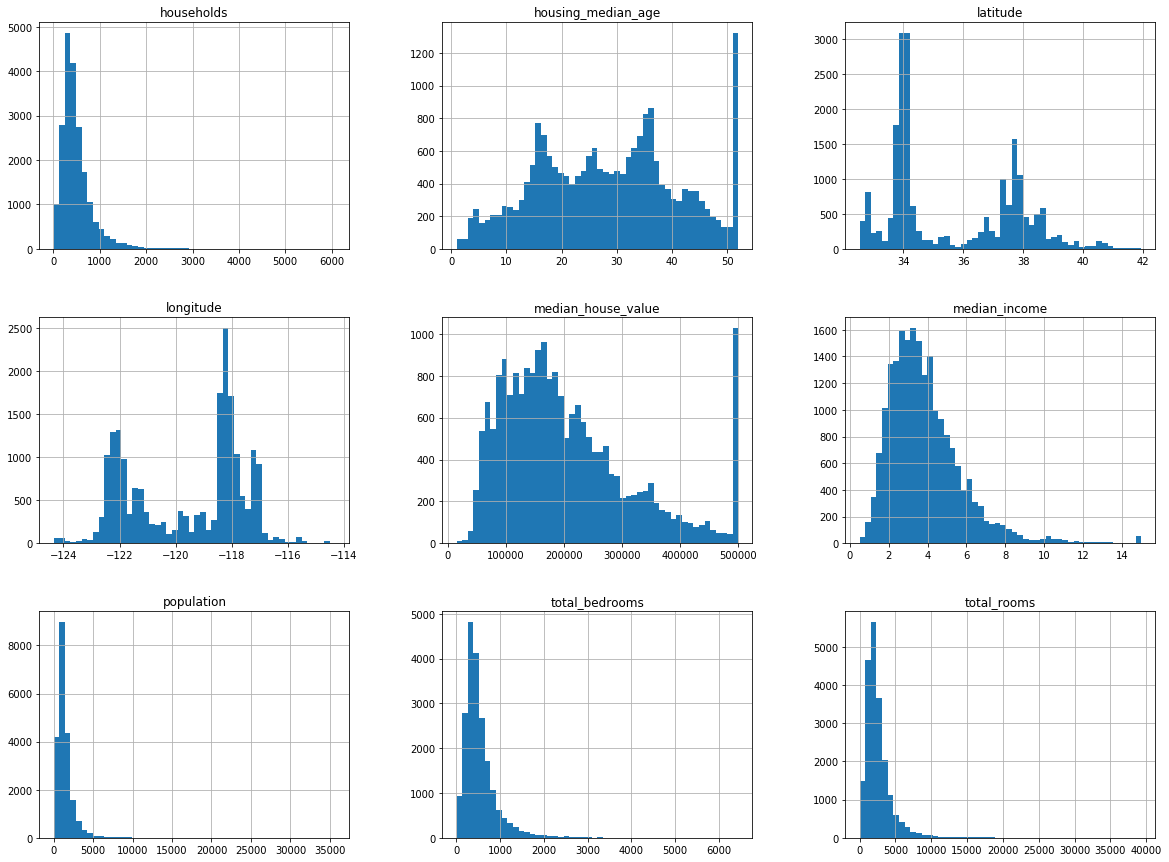

In [209]:
import matplotlib.pyplot as plt

raw.hist(bins=50, figsize=(20,15))


* `housing_median_age`: capped
* `median_house_value`: capped (target variable)
* `median_income`: capped, scaled

## Selecting the Test Set

This selection does not foresee data update.

### Skelearn default train_test_split

In [210]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw, test_size=0.2, random_state=42)

In [211]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        3921 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [212]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


*train_set* from sklearn does not have any missing value.

### Stratified Sklearn train_test_split

With prior knoledge, one can optimize splits to reflect data distribution characteristics, that will optmize models.

For expert opinion, one knows that the feature `median_income` is very important.

<span style="color:red"> It is not clear the best way to binning your continuum variable into a category for stratification. text</span>.

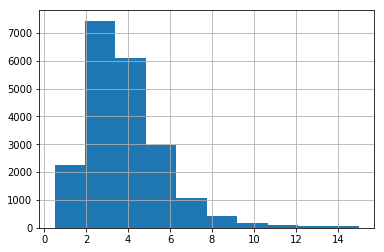

In [39]:
raw.median_income.hist()

The `median_income` distribution, does not match the one shown in the book, which is already categorized. I don't know how the book considered the categorization.

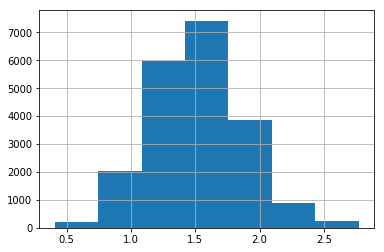

In [113]:
np.log(1+raw.median_income).hist(bins=7)

#### Linear bins for defining cats

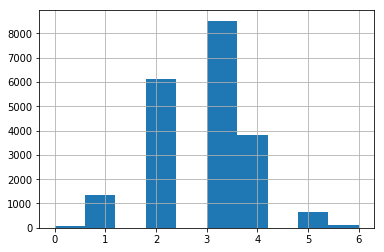

In [125]:
tst = raw.copy()
tst['log_median_income'] = np.log(1+tst.median_income)
cats = np.linspace(min(tst.log_median_income),
                   max(tst.log_median_income),
                   7)
tst['median_income_cat'] = np.argmin(abs(np.repeat(cats,len(tst)).reshape((len(cats),len(tst))) - tst.log_median_income.values),0)

tst.median_income_cat.hist()

#### Quantile bins for defining cats

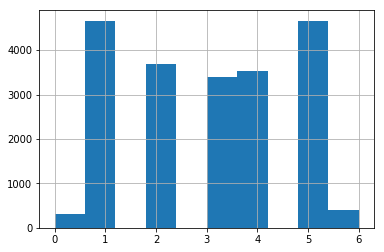

In [216]:
tst = raw.copy()
tst['log_median_income'] = np.log(1+tst.median_income)
quantiles = np.linspace(0,100,7)
cats = np.percentile(tst['log_median_income'],quantiles) 

tst['median_income_cat'] = np.argmin(abs(np.repeat(cats,len(tst)).reshape((len(cats),len(tst))) - tst.log_median_income.values),0)

tst.median_income_cat.hist()

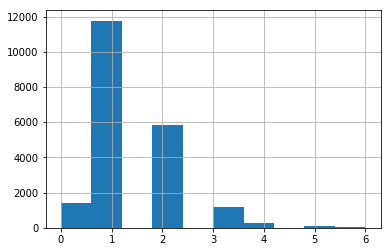

In [217]:
tst = raw.copy()
cats = np.linspace(min(tst.median_income),
                   max(tst.median_income),
                   7)
tst['median_income_cat'] = np.argmin(abs(np.repeat(cats,len(tst)).reshape((len(cats),len(tst))) - tst.median_income.values),0)

tst.median_income_cat.hist()

### Chosen Split

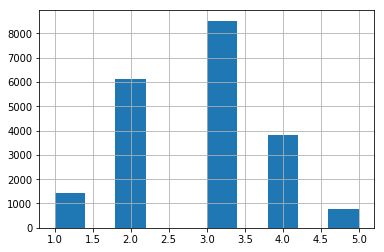

In [218]:
tst = raw.copy()
tst['log_median_income'] = np.log(1+tst.median_income)
cats = np.linspace(min(tst.log_median_income),
                   max(tst.log_median_income),
                   7)
tst['median_income_cat'] = np.argmin(abs(np.repeat(cats,len(tst)).reshape((len(cats),len(tst))) - tst.log_median_income.values),0)
tst['median_income_cat'] = tst['median_income_cat'].replace(0,1).replace(6,5)

tst.median_income_cat.hist()

In [428]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(tst, tst["median_income_cat"]):
    strat_train_set = raw.loc[train_index]
    strat_test_set = raw.loc[test_index]



In [427]:
train_set, test_set = train_test_split(raw, test_size=0.2, random_state=42)

In [429]:
propDict = {}

propDict['raw'] = raw["median_income_cat"].value_counts() / len(raw)
propDict['train'] = train_set["median_income_cat"].value_counts() / len(train_set)
propDict['test'] = test_set["median_income_cat"].value_counts() / len(test_set)
propDict['strat_train'] = strat_train_set["median_income_cat"].value_counts() / len(strat_train_set)
propDict['strat_test'] = strat_test_set["median_income_cat"].value_counts() / len(strat_test_set)


propDF = pd.DataFrame(propDict)

propDF['train_test_err'] = np.abs(propDict['train'] - propDict['test'])/(propDict['train']+propDict['test'])*2
propDF['strat_train_test_err'] = np.abs(propDict['strat_train'] - propDict['strat_test'])/(propDict['strat_train']+propDict['strat_test'])*2
propDF['train_raw_err'] = np.abs(propDict['train'] - propDict['raw'])/propDict['raw']
propDF['strat_train_raw_err'] = np.abs(propDict['strat_train'] - propDict['raw'])/propDict['raw']
propDF['test_raw_err'] = np.abs(propDict['test'] - propDict['raw'])/propDict['raw']
propDF['strat_test_raw_err'] = np.abs(propDict['strat_test'] - propDict['raw'])/propDict['raw']

propDF = propDF.sort_index()

print('The differecies between the distributions of both uniform sampling and stratified sampling are of at least 2 order of magnitude')

propDF

KeyError: 'median_income_cat'

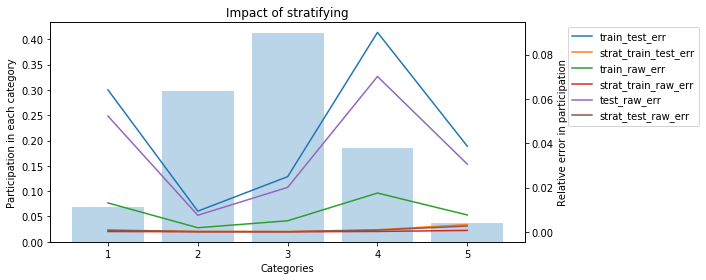

In [185]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.set_xlabel('Categories')
ax1.set_ylabel('Participation in each category')
ax1.bar(propDF.index,propDF.raw, alpha=0.3)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Relative error in participation')  # we already handled the x-label with ax1
ax2.plot(propDF.train_test_err,label='train_test_err')
ax2.plot(propDF.strat_train_test_err,label='strat_train_test_err')
ax2.plot(propDF.train_raw_err,label='train_raw_err')
ax2.plot(propDF.strat_train_raw_err,label='strat_train_raw_err')
ax2.plot(propDF.test_raw_err,label='test_raw_err')
ax2.plot(propDF.strat_test_raw_err,label='strat_test_raw_err')
plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left')
plt.title('Impact of stratifying')
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [392]:
def stratifyC1D(datainput, stratFeat=None ,binmethod='LinearBins', nbins=7, logtransform=False, adjust=False, graphs=True):

    data = datainput.copy()

    if stratFeat:

        #Perform log-transform
        if logtransform:

            data['log_'+stratFeat] = np.log(1+data[stratFeat])
            stratFeat = 'log_' + stratFeat


        #Apply chogen binning method for defining categories
        if binmethod=='LinearBins':

            cats = np.linspace(min(data[stratFeat]),
                               max(data[stratFeat]),
                               nbins)


        if binmethod=='QuantileBins':
            
            quantiles = np.linspace(0,100,nbins)
            cats = np.percentile(data[stratFeat],quantiles) 


        #Classificating each instance - stratfeat min distance from cats
        data[stratFeat+'_cat'] = np.argmin(abs(np.repeat(cats,len(data)).reshape((len(cats),len(data))) - data[stratFeat].values),0)


        #Agrupa as duas primeiras e as duas categoria
        data[stratFeat+'_adjust_cat'] = data[stratFeat+'_cat'].replace(0,1).replace(nbins-1,nbins-2)

        #Plotting
        if graphs:

            plt.figure(figsize=(10,5))
            plt.subplot(1,3,1)
            data[stratFeat].hist()
            for cat in cats:
                plt.axvline(cat,color='k',linestyle='--')
            plt.title('Original Distribution')

            plt.subplot(1,3,2)
            data[stratFeat+'_cat'].hist()
            plt.title('Categorical Distribution')

            plt.subplot(1,3,3)
            data[stratFeat+'_adjust_cat'].hist()
            plt.title('Categorical Distribution Ajusted')


        #Choosing ajusted
        if adjust:
            
            data = data.drop(axis=1,labels=[stratFeat+'_cat']).rename(columns={stratFeat+'_adjust_cat':stratFeat+'_cat'})
            cats = cats[1:-1]
       
        else:

            data = data.drop(axis=1,labels=[stratFeat+'_adjust_cat'])

    
        return data, cats

    
    else:
        print('Input feature to use as base for stratification.')


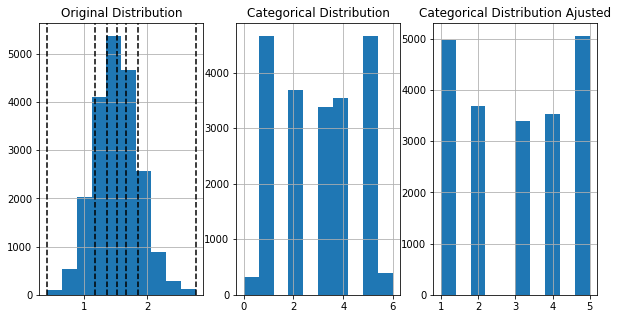

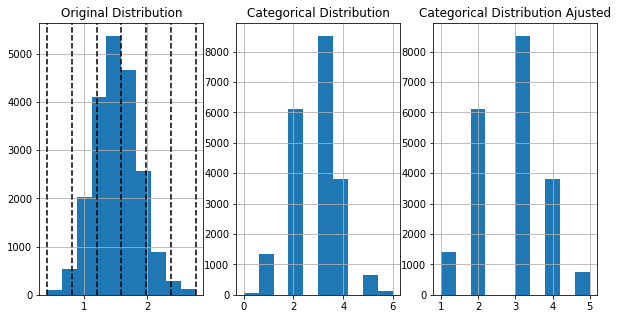

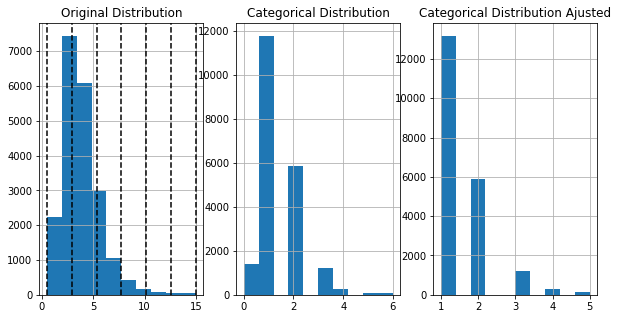

In [393]:
data, cats = stratifyC1D(raw,stratFeat='median_income',logtransform=True,binmethod='QuantileBins',adjust=False)
data, cats = stratifyC1D(raw,stratFeat='median_income',logtransform=True,binmethod='LinearBins',adjust=False)
data, cats = stratifyC1D(raw,stratFeat='median_income',logtransform=False,binmethod='LinearBins',adjust=False)

In [430]:
def create_sets(datainput,stratFeat=None):

    from sklearn.model_selection import StratifiedShuffleSplit

    if stratFeat:

        split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

        for train_index, test_index in split.split(datainput, datainput[stratFeat+'_cat']):
            strat_train_set = datainput.loc[train_index]
            strat_test_set = datainput.loc[test_index]

    else:

        print('Input feature to use as base for stratification.')

    from sklearn.model_selection import train_test_split

    train_set, test_set = train_test_split(datainput, test_size=0.2, random_state=42)

    return train_set, test_set, strat_train_set, strat_test_set


def calculate_errors(datainput, train_set, test_set, strat_train_set, strat_test_set, stratFeat):

    propDict = {}

    propDict['datainput'] = datainput[stratFeat+'_cat'].value_counts() / len(datainput)
    propDict['train'] = train_set[stratFeat+'_cat'].value_counts() / len(train_set)
    propDict['test'] = test_set[stratFeat+'_cat'].value_counts() / len(test_set)
    propDict['strat_train'] = strat_train_set[stratFeat+'_cat'].value_counts() / len(strat_train_set)
    propDict['strat_test'] = strat_test_set[stratFeat+'_cat'].value_counts() / len(strat_test_set)


    propDF = pd.DataFrame(propDict)

    propDF['train_test_err'] = np.abs(propDict['train'] - propDict['test'])/(propDict['train']+propDict['test'])*2
    propDF['strat_train_test_err'] = np.abs(propDict['strat_train'] - propDict['strat_test'])/(propDict['strat_train']+propDict['strat_test'])*2
    propDF['train_datainput_err'] = np.abs(propDict['train'] - propDict['datainput'])/propDict['datainput']
    propDF['strat_train_datainput_err'] = np.abs(propDict['strat_train'] - propDict['datainput'])/propDict['datainput']
    propDF['test_datainput_err'] = np.abs(propDict['test'] - propDict['datainput'])/propDict['datainput']
    propDF['strat_test_datainput_err'] = np.abs(propDict['strat_test'] - propDict['datainput'])/propDict['datainput']

    propDF = propDF.sort_index()

    return propDF

def plot_errors(propDF): 

    fig, ax1 = plt.subplots(figsize=(10,4))

    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Participation in each category')
    ax1.bar(propDF.index,propDF.datainput, alpha=0.3)
    #ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('Relative error in participation')  # we already handled the x-label with ax1
    ax2.plot(propDF.train_test_err,label='train_test_err')
    ax2.plot(propDF.strat_train_test_err,label='strat_train_test_err')
    ax2.plot(propDF.train_datainput_err,label='train_datainput_err')
    ax2.plot(propDF.strat_train_datainput_err,label='strat_train_datainput_err')
    ax2.plot(propDF.test_datainput_err,label='test_datainput_err')
    ax2.plot(propDF.strat_test_datainput_err,label='strat_test_datainput_err')
    plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left')
    plt.title('Impact of stratifying')
    #ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [433]:
data, cats = stratifyC1D(raw,stratFeat='median_income',logtransform=True,binmethod='LinearBins',adjust=True)
print(data.columns)
train_set, test_set, strat_train_test, strat_test_set = create_sets(data,stratFeat='log_median_income')
propDF = calculate_errors(data, train_set, test_set, strat_train_set, strat_test_set, stratFeat='log_median_income')
plot_errors(propDF)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'log_median_income',
       'log_median_income_cat'],
      dtype='object')


KeyError: 'log_median_income_cat'

In [431]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [385]:
cats

array([ 0.4999,  2.9166,  5.3333,  7.75  , 10.1667, 12.5834, 15.0001])

In [386]:
propDF

,datainput,train,test,strat_train,strat_test,train_test_err,strat_train_test_err,train_datainput_err,strat_train_datainput_err,test_datainput_err,strat_test_datainput_err
0,0.068120,0.067284,0.071463,NaN,0.068072,0.060236,NaN,0.012269,NaN,0.049075,0.000711
1,0.569816,0.567163,0.580426,0.068617,0.569767,0.023115,1.570060,0.004655,0.879581,0.018621,0.000085
2,0.284157,0.286640,0.274225,0.296936,0.284157,0.044272,0.043981,0.008738,0.044970,0.034953,0.000000
3,0.057994,0.059109,0.053537,0.412730,0.057897,0.098925,1.507914,0.019215,6.116750,0.076859,0.001671
4,0.013421,0.013384,0.013566,0.185259,0.013566,0.013483,1.727079,0.002708,12.804152,0.010830,0.010830
5,0.003585,0.003513,0.003876,0.036458,0.003634,0.098361,1.637462,0.020270,9.168919,0.081081,0.013514
6,0.002907,0.002907,0.002907,NaN,0.002907,0.000000,NaN,0.000000,NaN,0.000000,0.000000
